## Evaluation of the BERT base and LongBERT model

1. Loss and Accuracy Evaluation

In [1]:
import sys

# Append the directory containing the src folder to sys.path
sys.path.append('/Users/lars/Documents/test/')

In [2]:
from src.visualization.evaluation import plot_comparison, calculate_epoch_averages, plot_average_over_epochs, tokenize_text, create_freq_distribution, plot_barchart_helpdesk, plot_barchart_helpdesk_zoom, create_binned_freq_distribution, plot_barchart_bpic2012, plot_barchart_bpic2018, plot_barchart_bpic2018_zoom, tokenize_text_base
import pickle

/Users/lars/Documents/test/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
file_paths = {
    'helpdesk': '/Users/lars/Documents/test/models/models_pretrained/history_helpdesk.pkl',
    'bpic2012': '/Users/lars/Documents/test/models/models_pretrained/history_bpic2012.pkl',
    'bpic2018': '/Users/lars/Documents/test/models/models_pretrained/history_bpic2018.pkl',
    'long_helpdesk': '/Users/lars/Documents/test/models/models_pretrained/history_helpdesk_long.pkl',
    'long_bpic2012': '/Users/lars/Documents/test/models/models_pretrained/history_bpic2012_long.pkl'
}

histories = {}
for key, path in file_paths.items():
    with open(path, 'rb') as file:
        histories[key] = pickle.load(file)

print(histories)

{'helpdesk': {'loss': [0.7953119874000549, 0.6580520868301392, 0.6409521698951721, 0.6268112063407898, 0.613644003868103], 'accuracy': [0.8360531330108643, 0.8671726584434509, 0.8692219853401184, 0.8684629797935486, 0.8696015477180481], 'val_loss': [0.6017406582832336, 0.5915557146072388, 0.579470694065094, 0.5796663165092468, 0.5593796372413635], 'val_accuracy': [0.883778989315033, 0.8844919800758362, 0.8791443705558777, 0.883778989315033, 0.8852049708366394]}, 'bpic2012': {'loss': [1.4353610277175903, 1.210790753364563, 1.1426522731781006, 1.0896415710449219, 1.0506670475006104], 'accuracy': [0.6841042041778564, 0.7144845724105835, 0.717705488204956, 0.7187973260879517, 0.7190839648246765], 'val_loss': [1.3499048948287964, 1.2763112783432007, 1.2240335941314697, 1.1916929483413696, 1.1543976068496704], 'val_accuracy': [0.6960929036140442, 0.6908104419708252, 0.6964260339736938, 0.695712149143219, 0.695712149143219]}, 'bpic2018': {'loss': [0.7719523310661316, 0.5297698974609375, 0.492

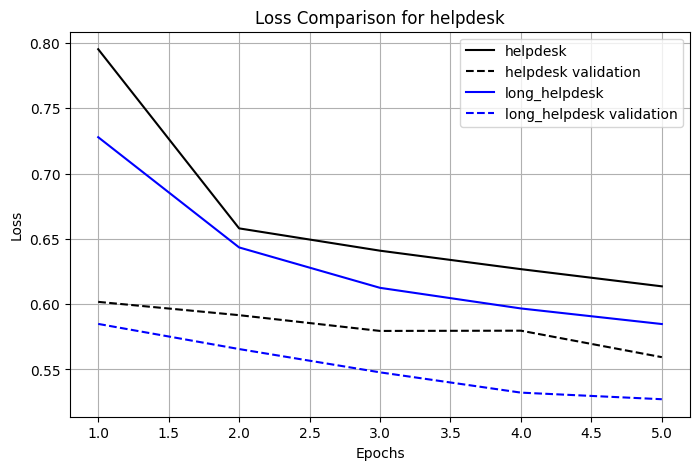

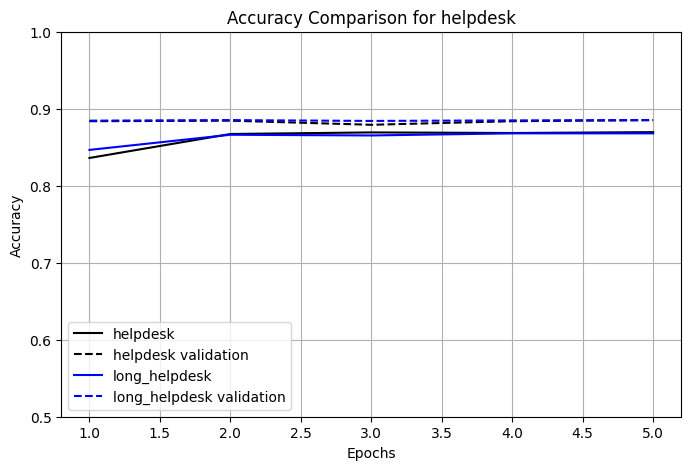

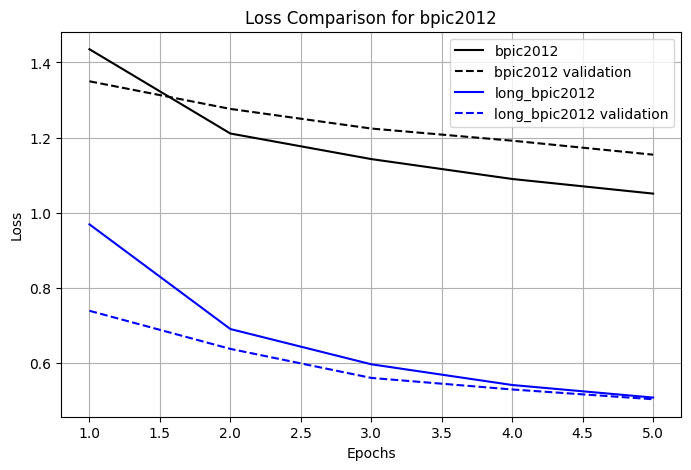

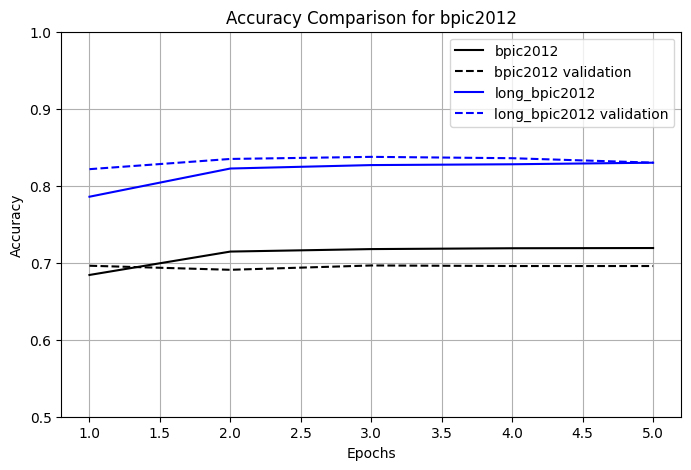

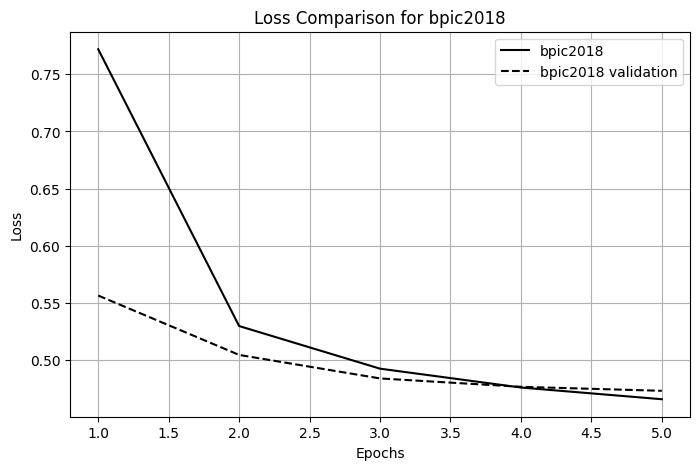

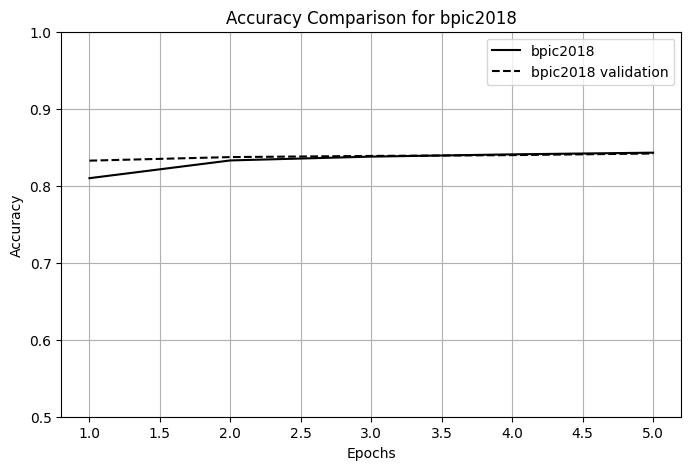

In [4]:
# Plot comparisons for all datasets and metrics
datasets = ['helpdesk', 'bpic2012', 'bpic2018']
metrics = ['loss', 'accuracy']

for dataset in datasets:
    for metric in metrics:
        plot_comparison(histories, dataset, metric)

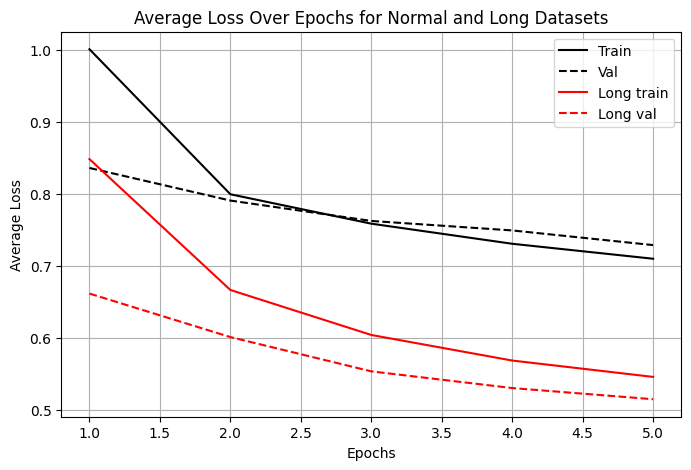

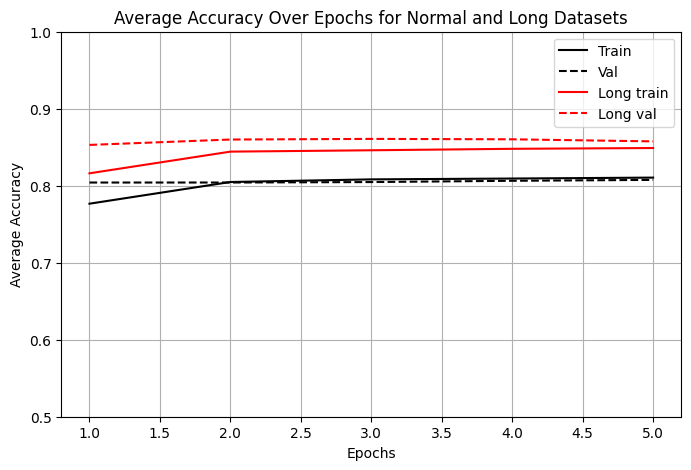

In [5]:
# Calculate epoch averages for loss and accuracy
loss_avg_values = calculate_epoch_averages(histories, 'loss')
accuracy_avg_values = calculate_epoch_averages(histories, 'accuracy')

# Plot average loss and accuracy over epochs
plot_average_over_epochs(loss_avg_values, 'loss')
plot_average_over_epochs(accuracy_avg_values, 'accuracy')

---
2 Sequence length analysis

2.1 LongBERT Tokenizer

2.1.1 Helpdesk

In [4]:
with open('/Users/lars/Documents/Uni/Masterarbeit/Online_Process_Concept_Drift/data/interim/2024-06-07_Short_Helpdesk_complete_next_activity.pkl', 'rb') as file:
    helpdesk_train = pickle.load(file)

with open('/Users/lars/Documents/Uni/Masterarbeit/Online_Process_Concept_Drift/data/interim/2024-06-07_Long_Helpdesk_complete_next_activity.pkl', 'rb') as file:
    helpdesk_train_long = pickle.load(file)


In [5]:
# Tokenize the datasets
tokenized_train = tokenize_text(helpdesk_train, 'Prefix_Trace')
tokenized_train_long = tokenize_text(helpdesk_train_long, 'Prefix_Trace')

# Get sequence lengths
sequence_lengths_train = [len(seq) for seq in tokenized_train]
sequence_lengths_train_long = [len(seq) for seq in tokenized_train_long]

# Create frequency distributions
freq_train = create_freq_distribution(sequence_lengths_train)
freq_train_long = create_freq_distribution(sequence_lengths_train_long)

In [6]:
sequence_lengths_train

[7,
 14,
 21,
 24,
 25,
 7,
 14,
 17,
 18,
 7,
 14,
 18,
 21,
 22,
 7,
 11,
 18,
 21,
 22,
 7,
 14,
 17,
 18,
 7,
 14,
 17,
 18,
 7,
 14,
 17,
 18,
 7,
 14,
 17,
 18,
 7,
 14,
 17,
 18,
 7,
 14,
 17,
 18,
 7,
 14,
 17,
 18,
 7,
 14,
 17,
 18,
 7,
 14,
 15,
 18,
 19,
 5,
 9,
 16,
 19,
 20,
 7,
 14,
 18,
 21,
 22,
 5,
 9,
 16,
 19,
 20,
 7,
 14,
 17,
 18,
 7,
 10,
 11,
 7,
 14,
 15,
 22,
 25,
 26,
 7,
 14,
 17,
 18,
 7,
 14,
 17,
 18,
 7,
 14,
 15,
 18,
 21,
 22,
 7,
 14,
 17,
 18,
 7,
 14,
 15,
 18,
 19,
 7,
 14,
 17,
 18,
 7,
 14,
 15,
 18,
 19,
 7,
 14,
 17,
 18,
 7,
 11,
 18,
 21,
 22,
 7,
 10,
 13,
 14,
 7,
 11,
 18,
 21,
 22,
 7,
 14,
 15,
 22,
 25,
 26,
 7,
 14,
 18,
 21,
 22,
 7,
 14,
 15,
 18,
 19,
 7,
 14,
 17,
 18,
 7,
 14,
 17,
 18,
 7,
 11,
 18,
 24,
 27,
 28,
 7,
 14,
 15,
 22,
 25,
 26,
 7,
 14,
 15,
 18,
 19,
 7,
 14,
 15,
 18,
 19,
 7,
 14,
 17,
 18,
 7,
 14,
 15,
 22,
 25,
 26,
 7,
 14,
 17,
 18,
 7,
 14,
 17,
 18,
 7,
 14,
 17,
 18,
 7,
 14,
 17,
 18,
 7,
 14,
 17,
 18

In [7]:
freq_train

{3: 1,
 5: 92,
 6: 7,
 7: 4094,
 8: 49,
 9: 164,
 10: 260,
 11: 485,
 12: 70,
 13: 140,
 14: 3621,
 15: 907,
 16: 122,
 17: 2553,
 18: 3281,
 19: 717,
 20: 263,
 21: 464,
 22: 573,
 23: 67,
 24: 137,
 25: 318,
 26: 264,
 27: 55,
 28: 72,
 29: 10,
 30: 2,
 31: 11,
 32: 9,
 36: 1}

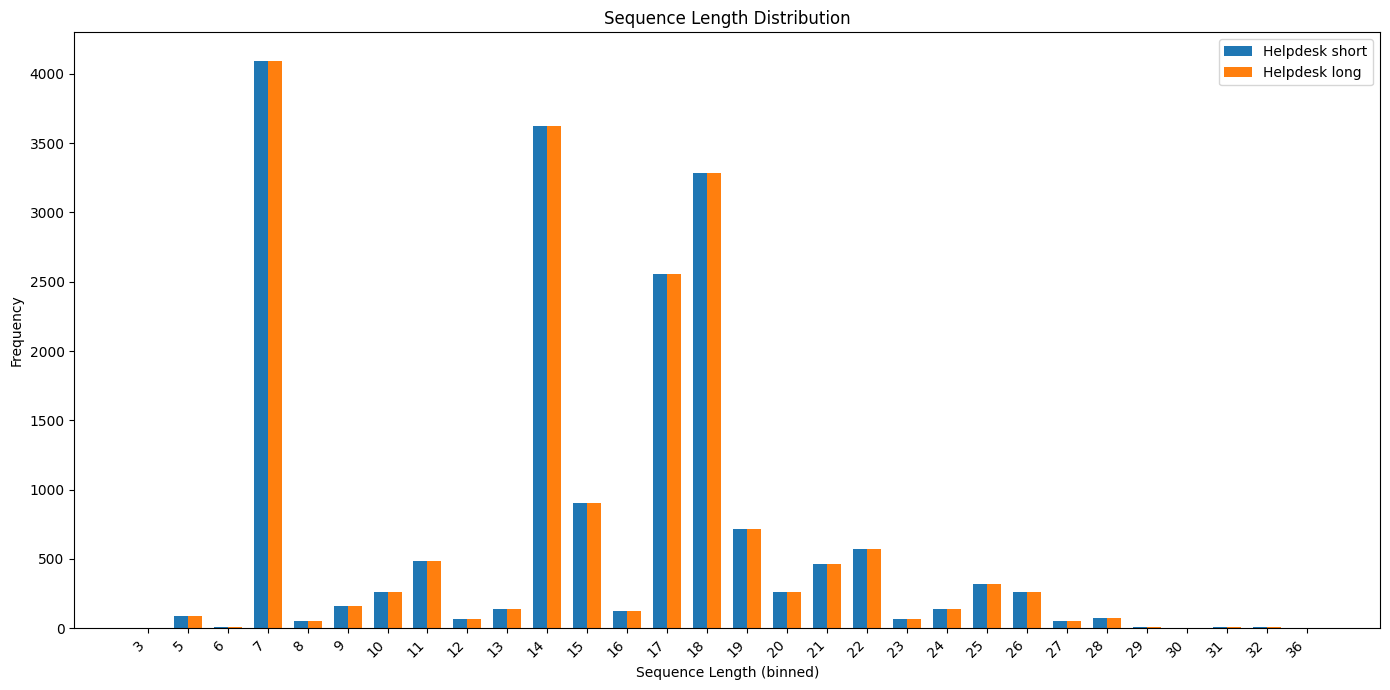

In [8]:
plot_barchart_helpdesk(freq_train, freq_train_long, 'Helpdesk short', 'Helpdesk long', 'Sequence Length Distribution')

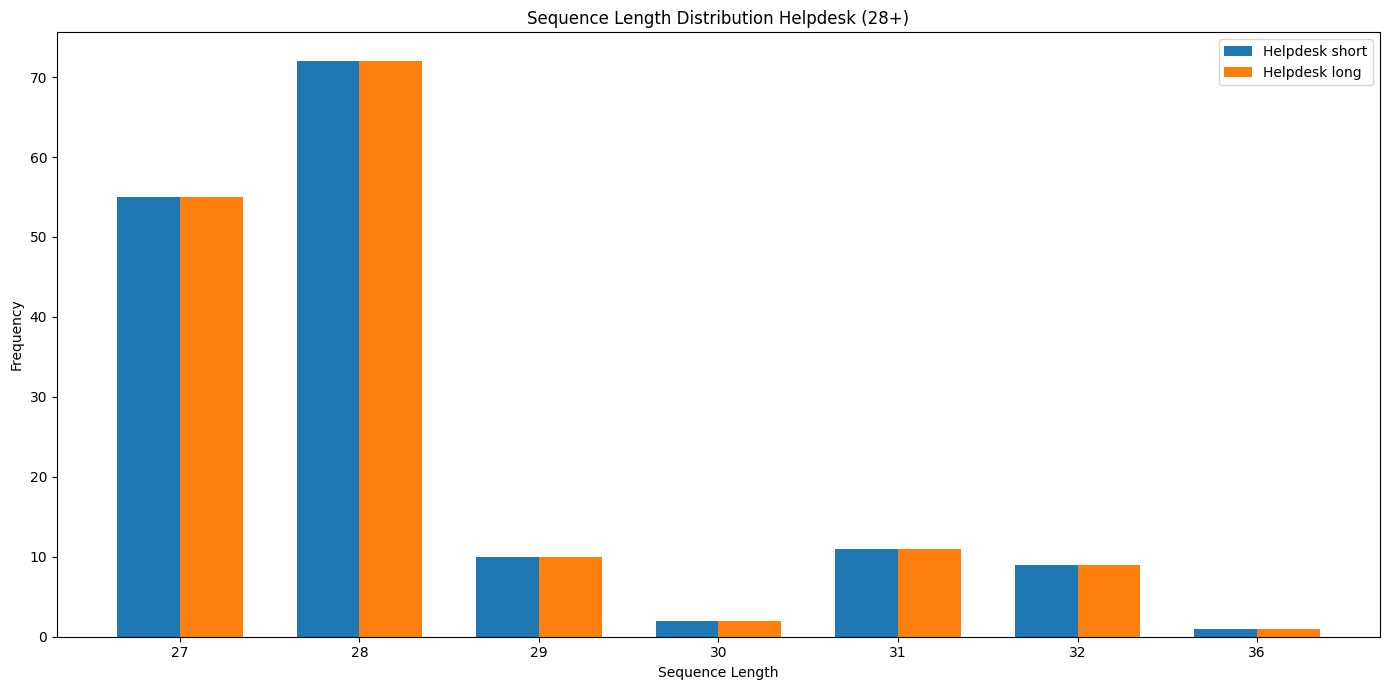

In [9]:
plot_barchart_helpdesk_zoom(freq_train, freq_train_long, 'Helpdesk short', 'Helpdesk long', 'Sequence Length Distribution Helpdesk (28+)', start=27)

---
2.1.2 BPIC2012

In [8]:
with open('/Users/lars/Documents/Uni/Masterarbeit/Online_Process_Concept_Drift/data/interim/2024-06-07_Short_BPIC2012_complete_next_activity.pkl', 'rb') as file:
    bpic2012_train = pickle.load(file)

with open('/Users/lars/Documents/Uni/Masterarbeit/Online_Process_Concept_Drift/data/interim/2024-06-07_Long_BPIC2012_complete_next_activity.pkl', 'rb') as file:
    bpic2012_train_long = pickle.load(file)

In [9]:
# Tokenize the datasets
tokenized_train = tokenize_text(bpic2012_train, 'Prefix_Trace')
tokenized_train_long = tokenize_text(bpic2012_train_long, 'Prefix_Trace')

# Get sequence lengths
sequence_lengths_train = [len(seq) for seq in tokenized_train]
sequence_lengths_train_long = [len(seq) for seq in tokenized_train_long]

# Create frequency distributions
freq_train = create_binned_freq_distribution(sequence_lengths_train)
freq_train_long = create_binned_freq_distribution(sequence_lengths_train_long)

In [10]:
freq_train

{(0, 9): 9185,
 (10, 19): 15155,
 (20, 29): 5756,
 (30, 39): 8907,
 (40, 49): 7537,
 (50, 59): 5024,
 (60, 69): 5211,
 (70, 79): 4618,
 (80, 89): 4211,
 (90, 99): 3892,
 (100, 109): 4357,
 (110, 119): 3404,
 (120, 129): 3629,
 (130, 139): 2982,
 (140, 149): 3064,
 (150, 159): 2854,
 (160, 169): 2613,
 (170, 179): 2376,
 (180, 189): 2204,
 (190, 199): 2060,
 (200, 209): 1889,
 (210, 219): 1750,
 (220, 229): 1543,
 (230, 239): 1348,
 (240, 249): 1259,
 (250, 259): 1085,
 (260, 269): 1019,
 (270, 279): 944,
 (280, 289): 851,
 (290, 299): 786,
 (300, 309): 661,
 (310, 319): 556,
 (320, 329): 520,
 (330, 339): 449,
 (340, 349): 396,
 (350, 359): 345,
 (360, 369): 295,
 (370, 379): 245,
 (380, 389): 198,
 (390, 399): 162,
 (400, 409): 147,
 (410, 419): 104,
 (420, 429): 71,
 (430, 439): 56,
 (440, 449): 31,
 (450, 459): 15,
 (460, 469): 8,
 (470, 479): 5,
 (480, 489): 1}

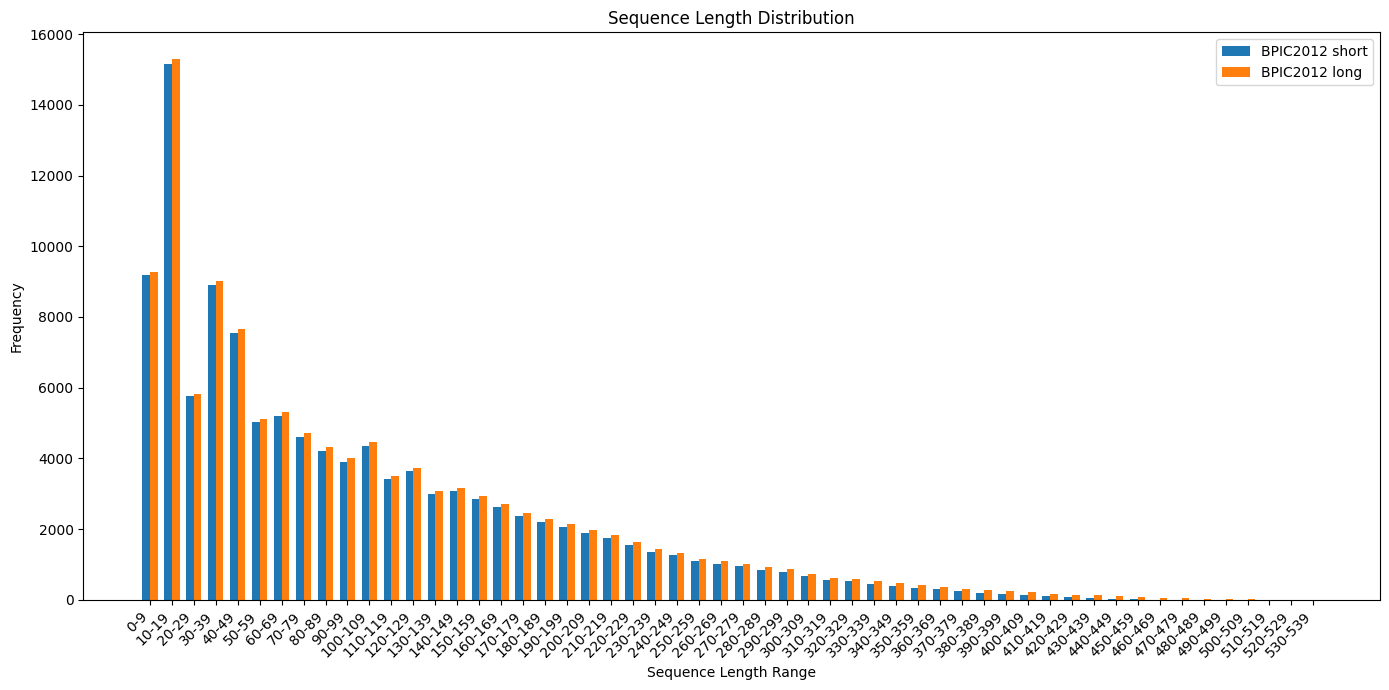

In [12]:
plot_barchart_bpic2012(freq_train, freq_train_long, 'BPIC2012 short', 'BPIC2012 long', 'Sequence Length Distribution')

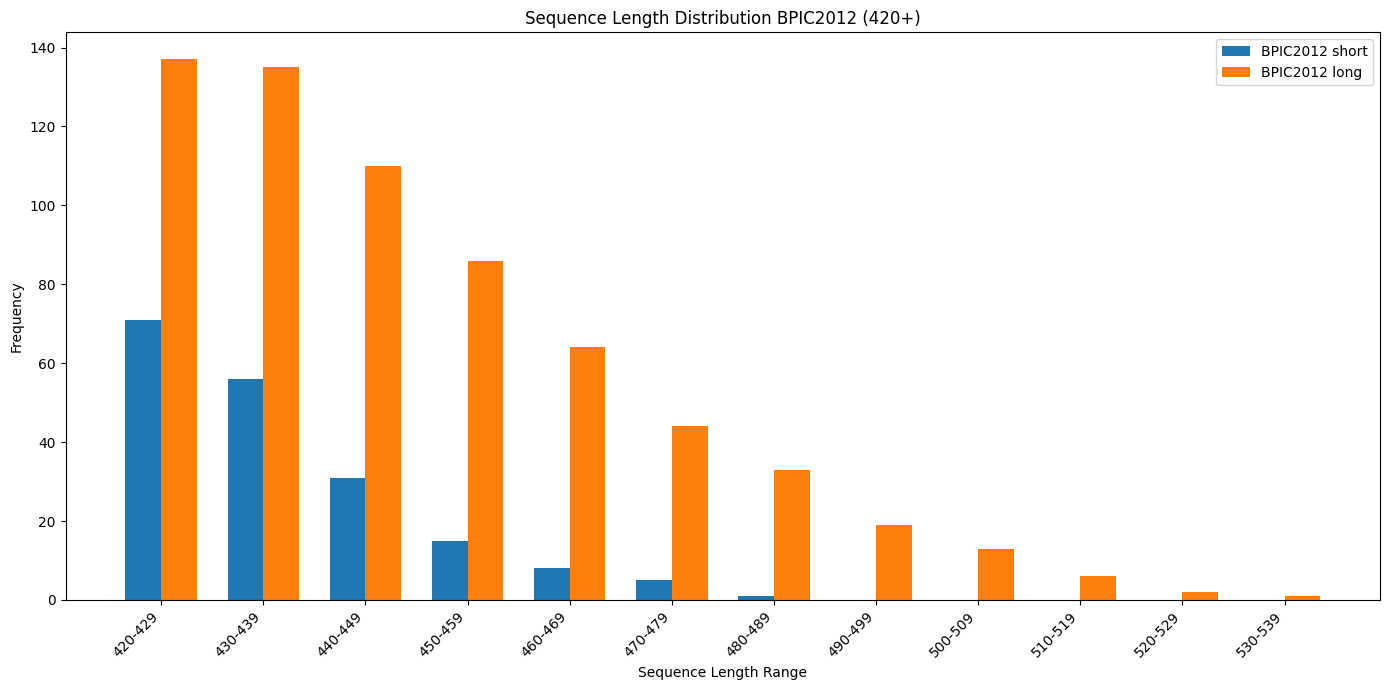

In [13]:
plot_barchart_bpic2012(freq_train, freq_train_long, 'BPIC2012 short', 'BPIC2012 long', 'Sequence Length Distribution BPIC2012 (420+)', min_length=420)

---
2.1.3 BPIC2018

In [11]:
with open('/Users/lars/Documents/Uni/Masterarbeit/Online_Process_Concept_Drift/data/interim/2024-06-07_Short_BPIC2018_complete_next_activity.pkl', 'rb') as file:
    bpic2018_train = pickle.load(file)

with open('/Users/lars/Documents/Uni/Masterarbeit/Online_Process_Concept_Drift/data/interim/2024-06-07_Long_BPIC2018_complete_next_activity.pkl', 'rb') as file:
    bpic2018_train_long = pickle.load(file)


In [12]:
# Tokenize the datasets
tokenized_train = tokenize_text(bpic2018_train, 'Prefix_Trace')
tokenized_train_long = tokenize_text(bpic2018_train_long, 'Prefix_Trace')

# Get sequence lengths
sequence_lengths_train = [len(seq) for seq in tokenized_train]
sequence_lengths_train_long = [len(seq) for seq in tokenized_train_long]

# Create binned frequency distributions
freq_train = create_binned_freq_distribution(sequence_lengths_train)
freq_train_long = create_binned_freq_distribution(sequence_lengths_train_long)

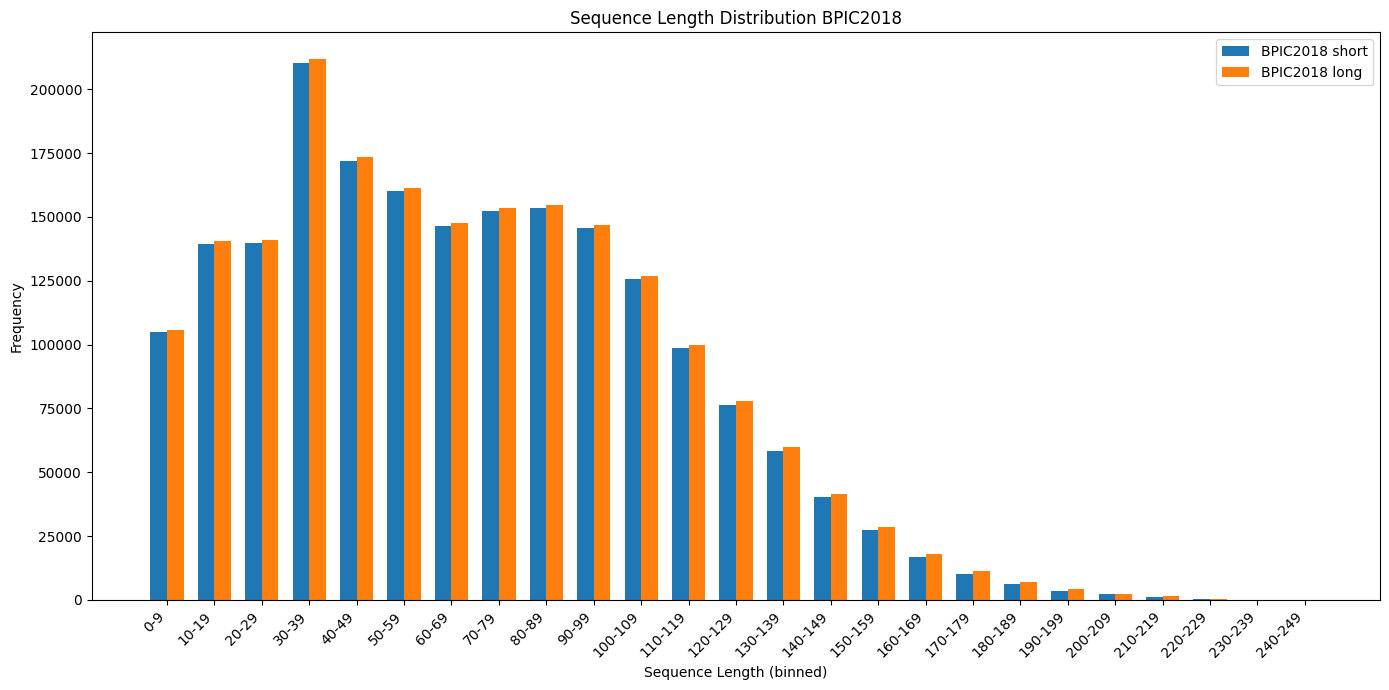

In [16]:
plot_barchart_bpic2018(freq_train, freq_train_long, 'BPIC2018 short', 'BPIC2018 long', 'Sequence Length Distribution BPIC2018')

In [17]:
# Create frequency distributions
freq_train = create_freq_distribution(sequence_lengths_train)
freq_train_long = create_freq_distribution(sequence_lengths_train_long)

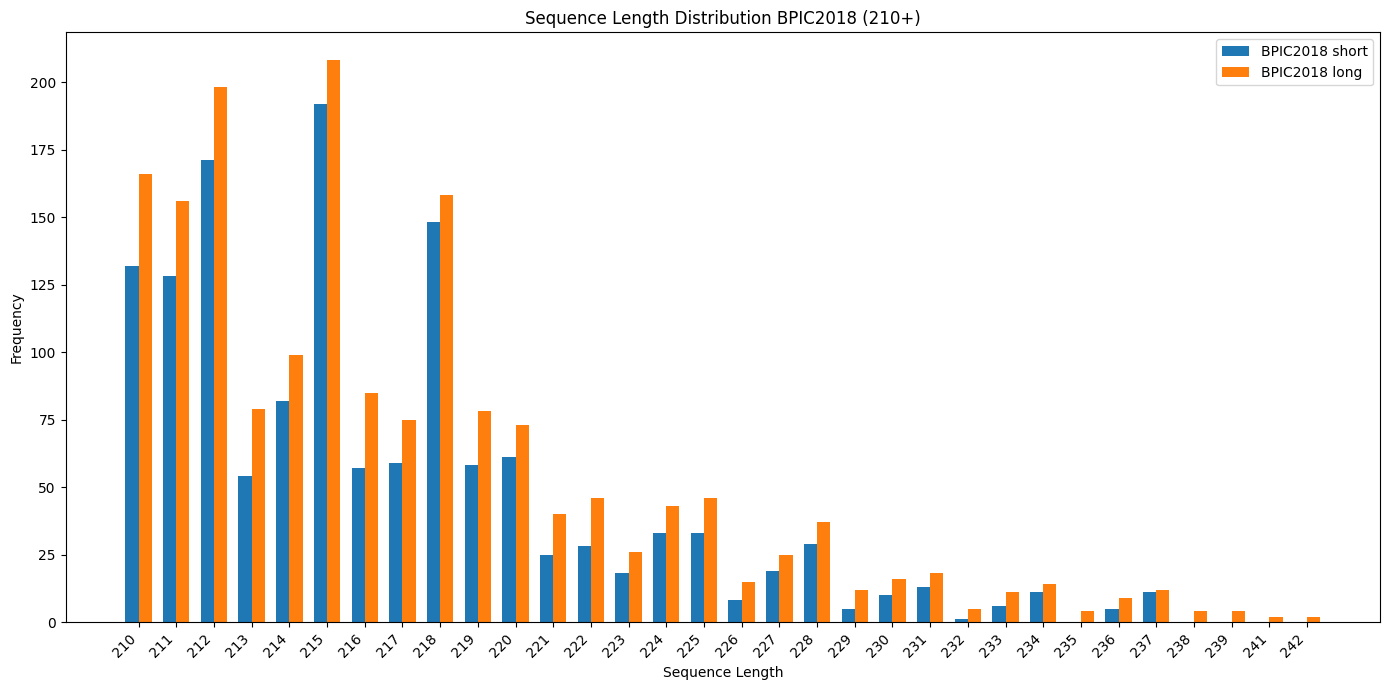

In [18]:
# Plot the bar charts zoomed in from 210 to the end without bins
plot_barchart_bpic2018_zoom(freq_train, freq_train_long, 'BPIC2018 short', 'BPIC2018 long', 'Sequence Length Distribution BPIC2018 (210+)', min_length=210)

---
2.2 BERT Base tokenizer

2.2.1 Helpdesk

In [19]:
from transformers import BertTokenizer

In [20]:
with open('/Users/lars/Documents/Uni/Masterarbeit/Online_Process_Concept_Drift/data/interim/2024-06-07_Short_Helpdesk_complete_next_activity.pkl', 'rb') as file:
    helpdesk_train = pickle.load(file)

with open('/Users/lars/Documents/Uni/Masterarbeit/Online_Process_Concept_Drift/data/interim/2024-06-07_Long_Helpdesk_complete_next_activity.pkl', 'rb') as file:
    helpdesk_train_long = pickle.load(file)


In [21]:
# Tokenize the datasets
tokenized_train = tokenize_text(helpdesk_train, 'Prefix_Trace')
tokenized_train_long = tokenize_text(helpdesk_train_long, 'Prefix_Trace')

# Get sequence lengths
sequence_lengths_train = [len(seq) for seq in tokenized_train]
sequence_lengths_train_long = [len(seq) for seq in tokenized_train_long]

# Create frequency distributions
freq_train = create_freq_distribution(sequence_lengths_train)
freq_train_long = create_freq_distribution(sequence_lengths_train_long)

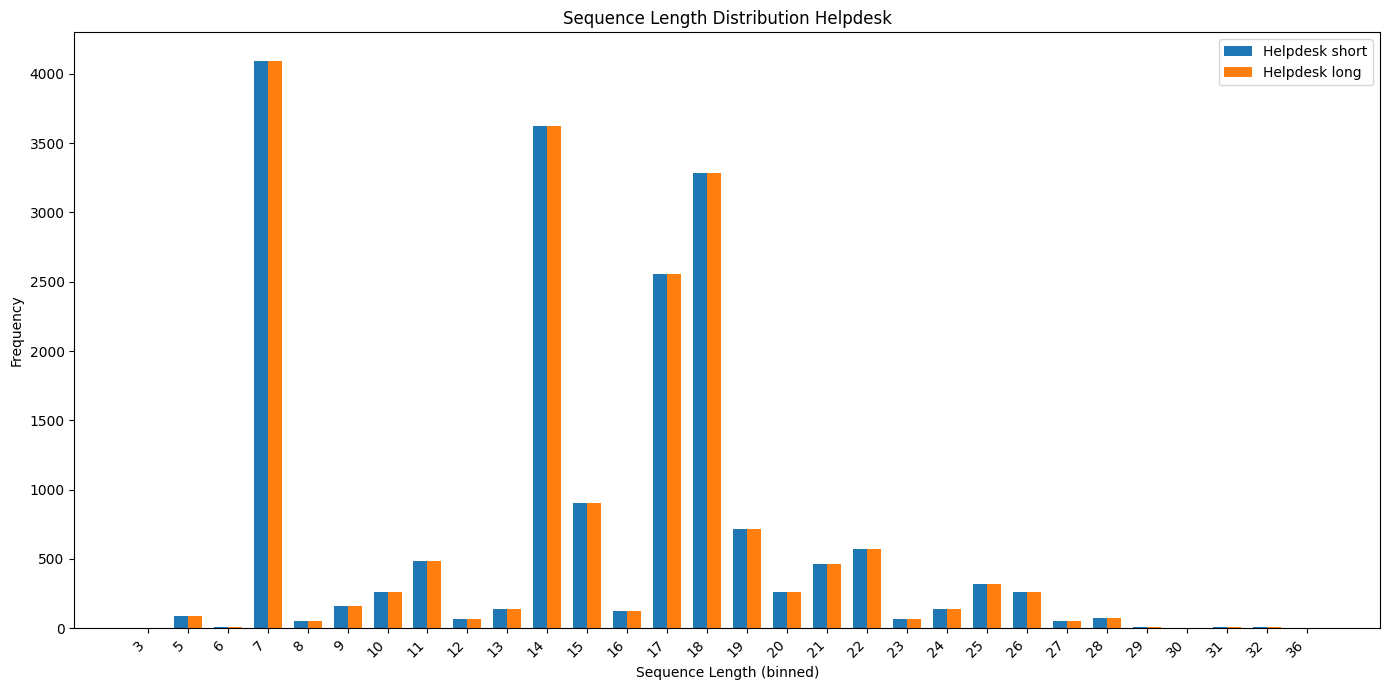

In [22]:
plot_barchart_helpdesk(freq_train, freq_train_long, 'Helpdesk short', 'Helpdesk long', 'Sequence Length Distribution Helpdesk')


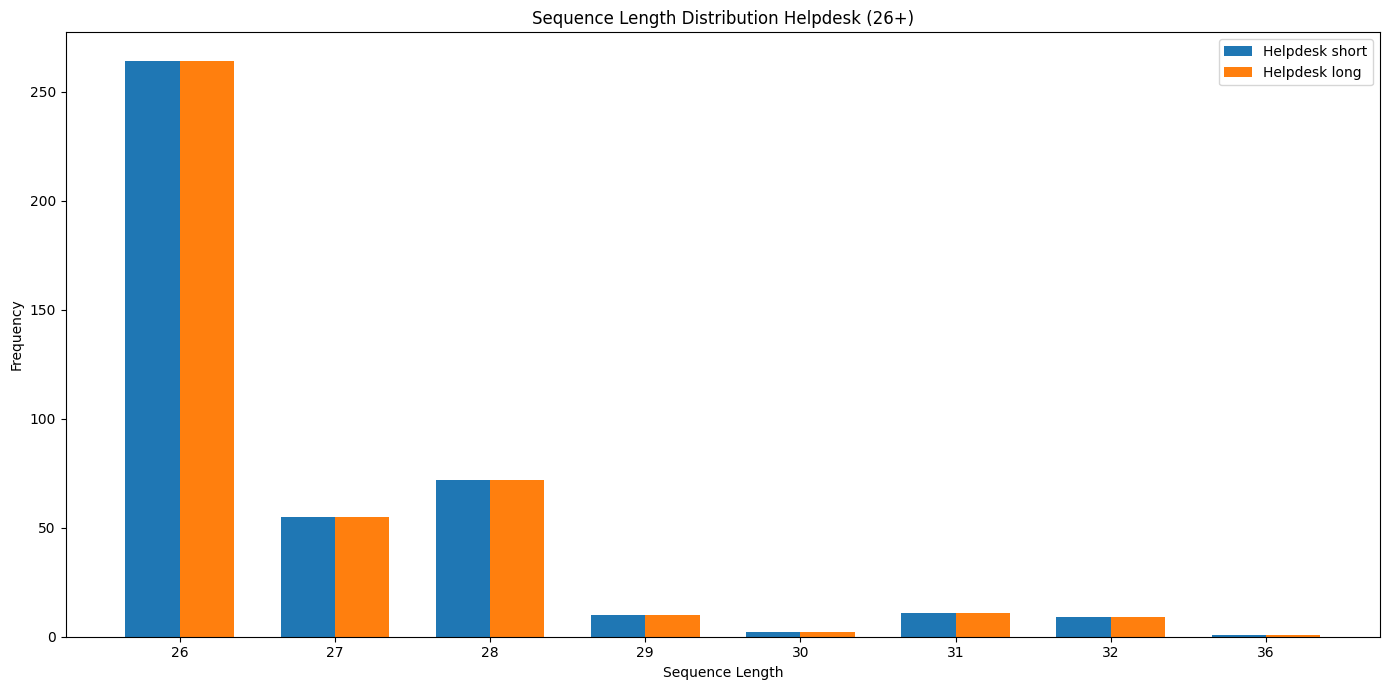

In [23]:
plot_barchart_helpdesk_zoom(freq_train, freq_train_long, 'Helpdesk short', 'Helpdesk long', 'Sequence Length Distribution Helpdesk (26+)')

---
2.2.2 BPIC2012

In [24]:
with open('/Users/lars/Documents/Uni/Masterarbeit/Online_Process_Concept_Drift/data/interim/2024-06-07_Short_BPIC2012_complete_next_activity.pkl', 'rb') as file:
    bpic2012_train = pickle.load(file)

with open('/Users/lars/Documents/Uni/Masterarbeit/Online_Process_Concept_Drift/data/interim/2024-06-07_Long_BPIC2012_complete_next_activity.pkl', 'rb') as file:
    bpic2012_train_long = pickle.load(file)

In [25]:
tokenized_train = tokenize_text(bpic2012_train, 'Prefix_Trace')
tokenized_train_long = tokenize_text(bpic2012_train_long, 'Prefix_Trace')

In [26]:
# Get sequence lengths
sequence_lengths_train = [len(seq) for seq in tokenized_train]
sequence_lengths_train_long = [len(seq) for seq in tokenized_train_long]

# Create binned frequency distributions
freq_train = create_binned_freq_distribution(sequence_lengths_train)
freq_train_long = create_binned_freq_distribution(sequence_lengths_train_long)

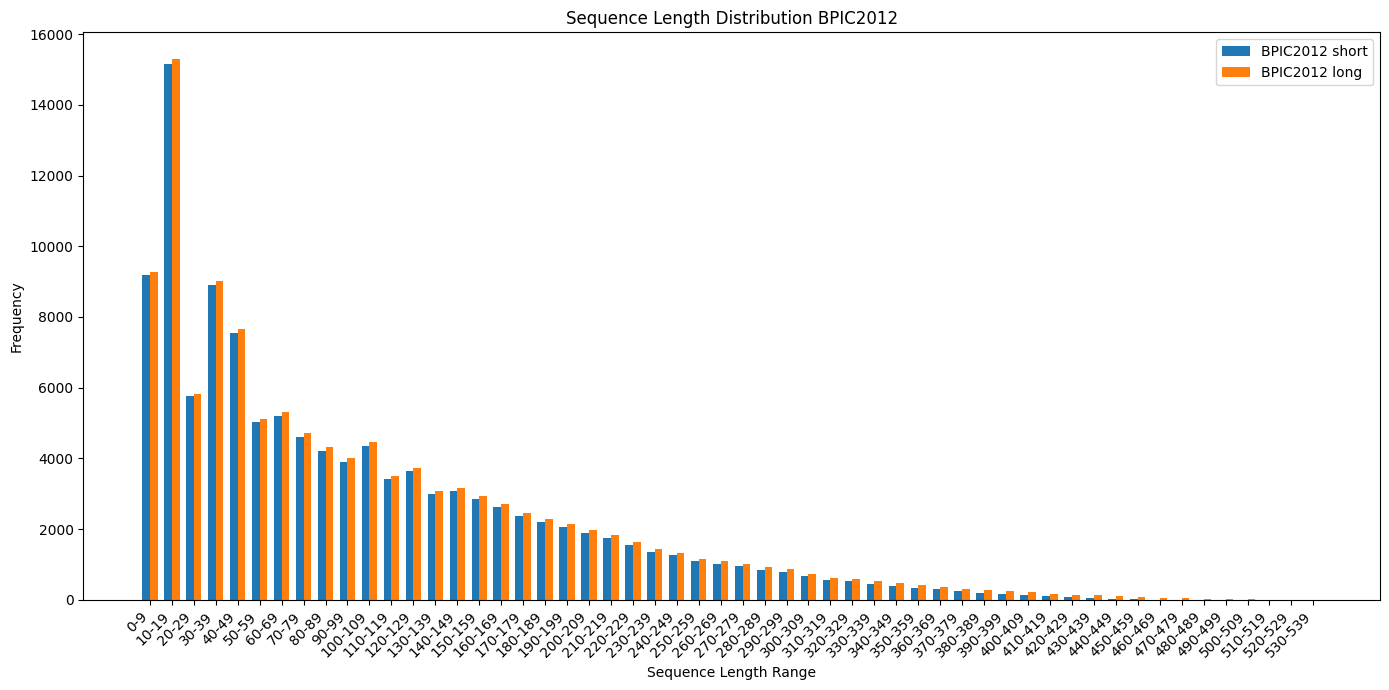

In [27]:
plot_barchart_bpic2012(freq_train, freq_train_long, 'BPIC2012 short', 'BPIC2012 long', 'Sequence Length Distribution BPIC2012')

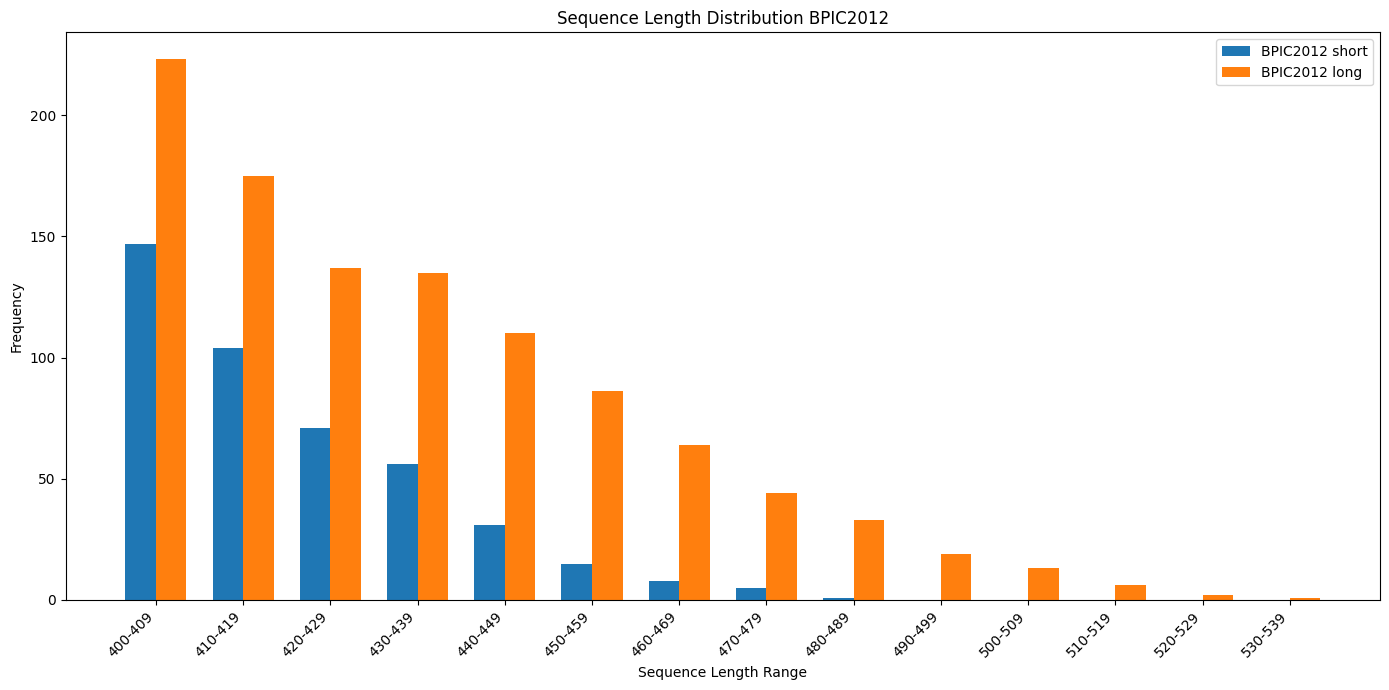

In [28]:
plot_barchart_bpic2012(freq_train, freq_train_long, 'BPIC2012 short', 'BPIC2012 long', 'Sequence Length Distribution BPIC2012', min_length=400)

---
2.2.3 BPIC2018

In [29]:
with open('/Users/lars/Documents/Uni/Masterarbeit/Online_Process_Concept_Drift/data/interim/2024-06-07_Short_BPIC2018_complete_next_activity.pkl', 'rb') as file:
    helpdesk_train = pickle.load(file)

with open('/Users/lars/Documents/Uni/Masterarbeit/Online_Process_Concept_Drift/data/interim/2024-06-07_Long_BPIC2018_complete_next_activity.pkl', 'rb') as file:
    helpdesk_train_long = pickle.load(file)


In [30]:
# Tokenize the datasets
tokenized_train = tokenize_text(helpdesk_train, 'Prefix_Trace')
tokenized_train_long = tokenize_text(helpdesk_train_long, 'Prefix_Trace')

# Get sequence lengths
sequence_lengths_train = [len(seq) for seq in tokenized_train]
sequence_lengths_train_long = [len(seq) for seq in tokenized_train_long]

In [31]:
# Create binned frequency distributions
freq_train = create_binned_freq_distribution(sequence_lengths_train)
freq_train_long = create_binned_freq_distribution(sequence_lengths_train_long)

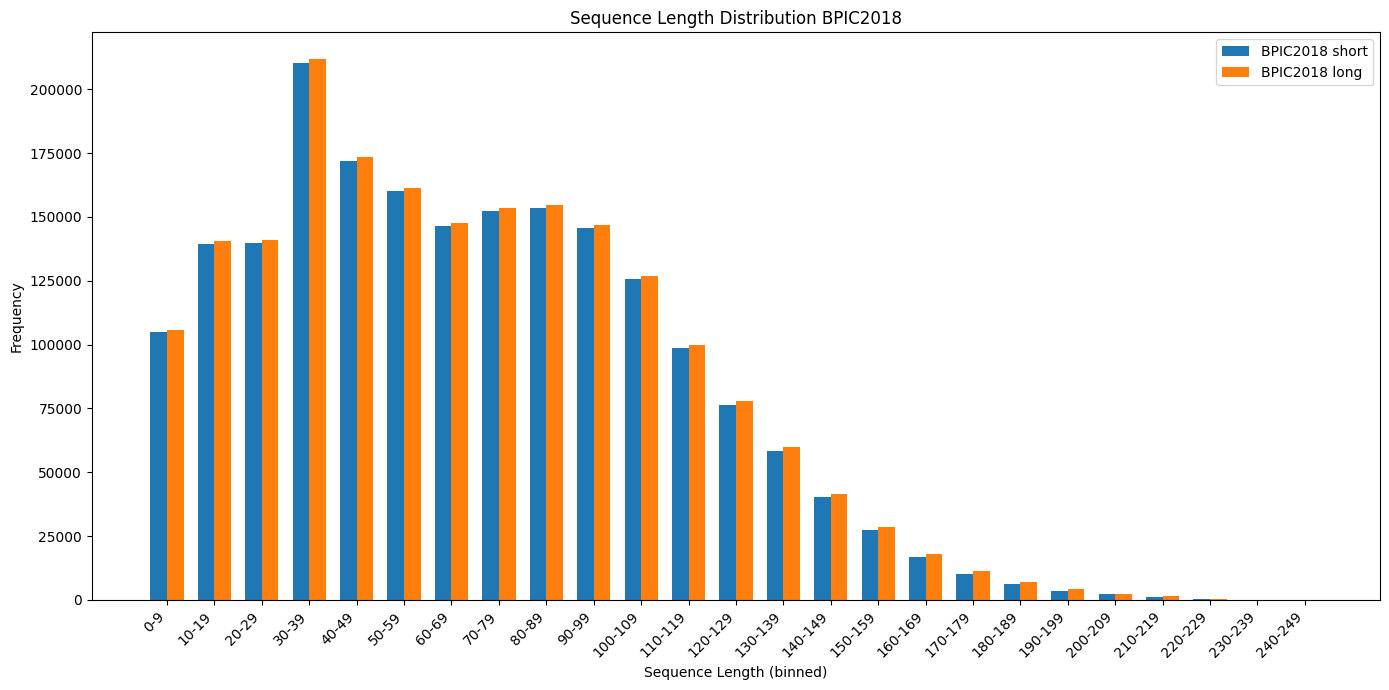

In [32]:
plot_barchart_bpic2018(freq_train, freq_train_long, 'BPIC2018 short', 'BPIC2018 long', 'Sequence Length Distribution BPIC2018')

In [33]:
# Create frequency distributions
freq_train = create_freq_distribution(sequence_lengths_train)
freq_train_long = create_freq_distribution(sequence_lengths_train_long)

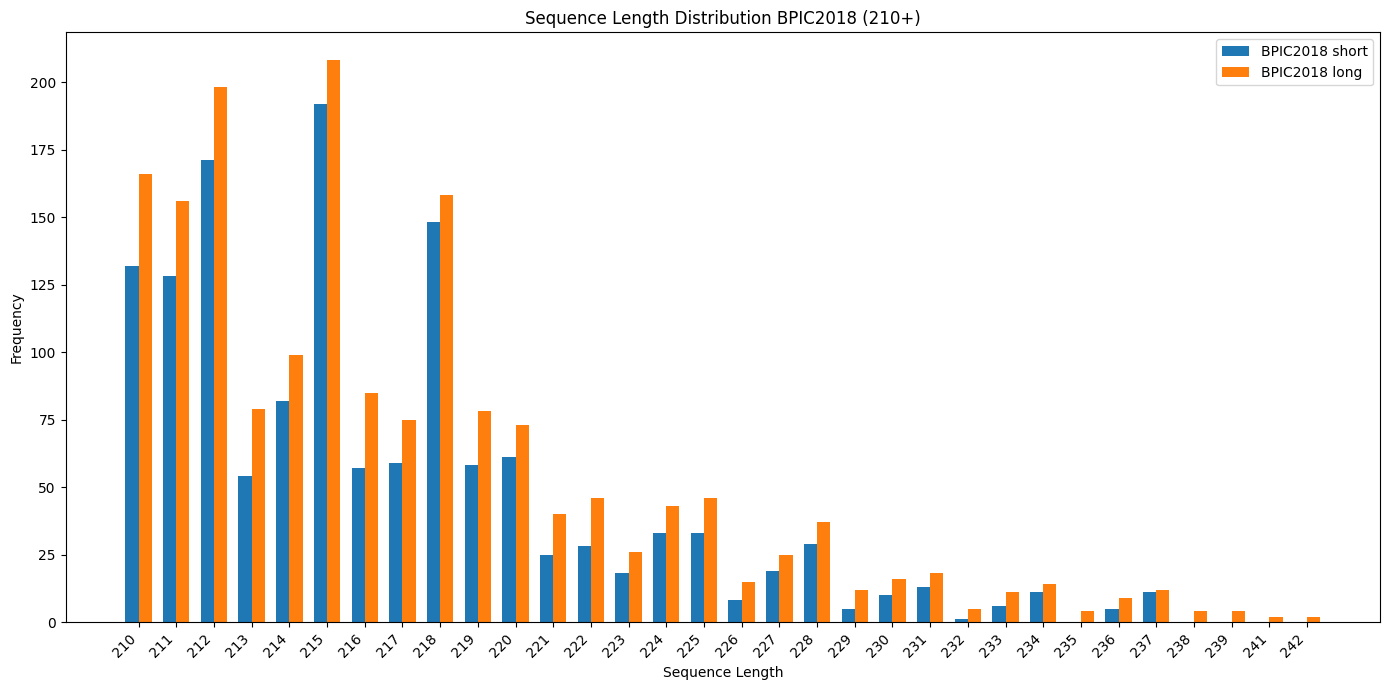

In [34]:
# Plot the bar charts zoomed in from 210 to the end without bins
plot_barchart_bpic2018_zoom(freq_train, freq_train_long, 'BPIC2018 short', 'BPIC2018 long', 'Sequence Length Distribution BPIC2018 (210+)', min_length=210)